<a href="https://colab.research.google.com/github/anshulbhute/Machine-Learning-Lab/blob/main/Bonus5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from google.colab import files
from sklearn.neighbors import NearestNeighbors

In [6]:
# Upload dataset manually in Google Colab
print("Please upload your dataset CSV file")
uploaded = files.upload()

# Load the dataset dynamically
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("Dataset Loaded Successfully")

# Display basic info
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()


Please upload your dataset CSV file


Saving Customer DataSet.csv to Customer DataSet (2).csv
Dataset Loaded Successfully
First 5 rows of the dataset:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FRE


Checking for missing values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Handling missing values by replacing NaNs with column mean

Standardizing the data
Data Standardization Complete

Determining the optimal number of clusters using the Elbow Method


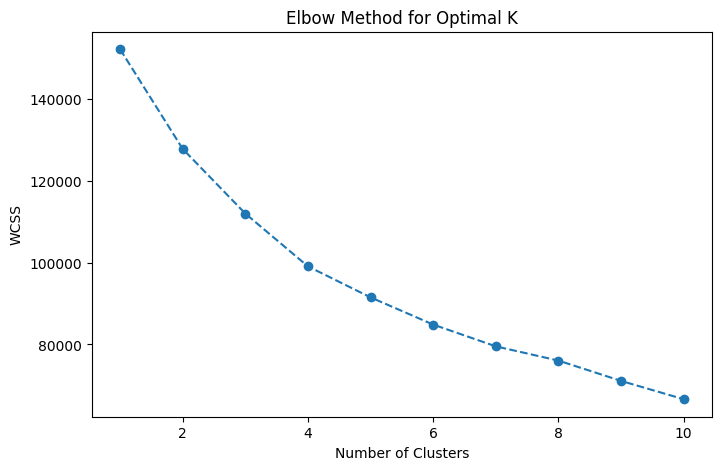


Elbow method plot displayed


In [7]:
# Step 2: Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())

# Selecting numerical columns for clustering
numerical_features = df.select_dtypes(include=[np.number]).columns

# Handle missing values in numerical columns
print("\nHandling missing values by replacing NaNs with column mean")
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()), axis=0)

# Standardize the data
print("\nStandardizing the data")
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])
print("Data Standardization Complete")

# Step 3: K-Means Clustering
print("\nDetermining the optimal number of clusters using the Elbow Method")
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()
print("\nElbow method plot displayed")



Applying K-Means clustering with K=3
K-Means Clustering Complete

Finding optimal eps using K-Distance plot


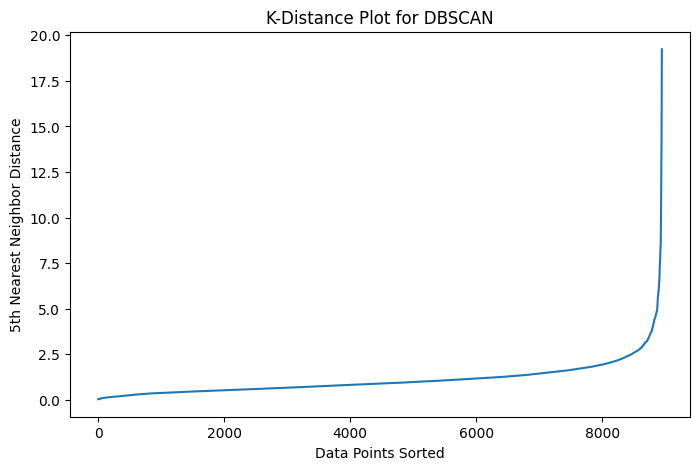


K-Distance plot displayed

Applying DBSCAN clustering with eps=0.5 and min_samples=5
DBSCAN Clustering Complete


In [8]:
# Choosing K=3 for clustering (based on Elbow Method, adjust if needed)
print("\nApplying K-Means clustering with K=3")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels
print("K-Means Clustering Complete")

# Step 4: DBSCAN Clustering
print("\nFinding optimal eps using K-Distance plot")

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df_scaled)
distances, indices = neigh.kneighbors(df_scaled)
avg_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(avg_distances)
plt.xlabel('Data Points Sorted')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-Distance Plot for DBSCAN')
plt.show()
print("\nK-Distance plot displayed")

# Setting eps and min_samples based on plot analysis
print("\nApplying DBSCAN clustering with eps=0.5 and min_samples=5")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = dbscan_labels
print("DBSCAN Clustering Complete")


Evaluating Clustering Performance
K-Means Silhouette Score: 0.25055570796307736
DBSCAN Silhouette Score: -0.4437013266683457

Visualizing Clustering Results


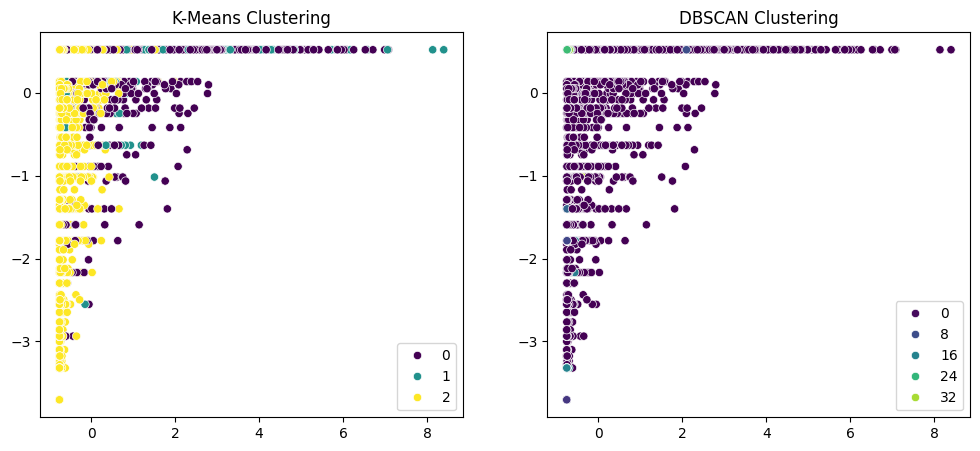

Visualization Complete

Recommendations:
- K-Means works better when clusters are well-separated.
- DBSCAN is useful for detecting outliers and identifying irregular patterns.
- If the goal is to segment customers into distinct marketing groups, K-Means is a better choice.
- If identifying outliers is important (e.g., fraudulent customers), DBSCAN is recommended.

Clustered Data Saved Successfully


In [9]:
# Step 5: Evaluate and Compare Clustering Results
print("\nEvaluating Clustering Performance")
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN did not form multiple clusters")

# Visualizing K-Means vs. DBSCAN
print("\nVisualizing Clustering Results")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()
print("Visualization Complete")

# Step 6: Recommendations
print("\nRecommendations:")
print("- K-Means works better when clusters are well-separated.")
print("- DBSCAN is useful for detecting outliers and identifying irregular patterns.")
print("- If the goal is to segment customers into distinct marketing groups, K-Means is a better choice.")
print("- If identifying outliers is important (e.g., fraudulent customers), DBSCAN is recommended.")

# Save the results
df.to_csv('Clustered_Data.csv', index=False)
print("\nClustered Data Saved Successfully")